# Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load the dataset

In [7]:
df = pd.read_csv("honey_yield.csv")
df

,Month,Hive_Type,Colony_Strength,Feeding_Type,Disease_Status,Forage_Availability,Rainfall_mm,Season,Honey_Yield_kg
0,July,Langstroth,Weak,NaN,Foulbrood,Low,139,Dry,41
1,April,Traditional,Weak,Pollen Patties,Nosema,Low,164,Dry,14
2,November,Langstroth,Medium,Pollen Patties,Foulbrood,Medium,154,Rainy,14
3,August,Langstroth,Strong,Pollen Patties,Varroa Mites,Low,184,Rainy,23
4,May,Traditional,Strong,Pollen Patties,Nosema,Medium,107,Rainy,21
...,...,...,...,...,...,...,...,...,...
95,December,Top-Bar,Strong,Pollen Patties,Nosema,Low,180,Transitional,58
96,December,Langstroth,Weak,Pollen Patties,Nosema,High,141,Rainy,20
97,December,Langstroth,Strong,Protein Supplement,Varroa Mites,Medium,162,Transitional,12
98,September,Traditional,Strong,NaN,Healthy,High,105,Rainy,8


 # Data Preprocessing

In [8]:
# Drop any columns that may not be needed (for example, 'Month' if it's not relevant for prediction)
df = df.drop(columns=['Month'])
df

,Hive_Type,Colony_Strength,Feeding_Type,Disease_Status,Forage_Availability,Rainfall_mm,Season,Honey_Yield_kg
0,Langstroth,Weak,NaN,Foulbrood,Low,139,Dry,41
1,Traditional,Weak,Pollen Patties,Nosema,Low,164,Dry,14
2,Langstroth,Medium,Pollen Patties,Foulbrood,Medium,154,Rainy,14
3,Langstroth,Strong,Pollen Patties,Varroa Mites,Low,184,Rainy,23
4,Traditional,Strong,Pollen Patties,Nosema,Medium,107,Rainy,21
...,...,...,...,...,...,...,...,...
95,Top-Bar,Strong,Pollen Patties,Nosema,Low,180,Transitional,58
96,Langstroth,Weak,Pollen Patties,Nosema,High,141,Rainy,20
97,Langstroth,Strong,Protein Supplement,Varroa Mites,Medium,162,Transitional,12
98,Traditional,Strong,NaN,Healthy,High,105,Rainy,8


# Handle missing values

In [9]:
df.isnull().sum()

Hive_Type               0
Colony_Strength         0
Feeding_Type           30
Disease_Status          0
Forage_Availability     0
Rainfall_mm             0
Season                  0
Honey_Yield_kg          0
dtype: int64

In [13]:
# Identify numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Fill missing values for numeric columns with their mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Handle categorical columns (if any) using appropriate techniques
# For example, we can fill missing values with the mode (most frequent value) for categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df


,Hive_Type,Colony_Strength,Feeding_Type,Disease_Status,Forage_Availability,Rainfall_mm,Season,Honey_Yield_kg
0,Langstroth,Weak,Sugar Syrup,Foulbrood,Low,139,Dry,41
1,Traditional,Weak,Pollen Patties,Nosema,Low,164,Dry,14
2,Langstroth,Medium,Pollen Patties,Foulbrood,Medium,154,Rainy,14
3,Langstroth,Strong,Pollen Patties,Varroa Mites,Low,184,Rainy,23
4,Traditional,Strong,Pollen Patties,Nosema,Medium,107,Rainy,21
...,...,...,...,...,...,...,...,...
95,Top-Bar,Strong,Pollen Patties,Nosema,Low,180,Transitional,58
96,Langstroth,Weak,Pollen Patties,Nosema,High,141,Rainy,20
97,Langstroth,Strong,Protein Supplement,Varroa Mites,Medium,162,Transitional,12
98,Traditional,Strong,Sugar Syrup,Healthy,High,105,Rainy,8


In [14]:
df.isnull().sum()

Hive_Type              0
Colony_Strength        0
Feeding_Type           0
Disease_Status         0
Forage_Availability    0
Rainfall_mm            0
Season                 0
Honey_Yield_kg         0
dtype: int64


# Model training (LR and DT)

In [28]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns

In [29]:
categorical_columns

Index(['Hive_Type', 'Colony_Strength', 'Feeding_Type', 'Disease_Status',
       'Forage_Availability', 'Season'],
      dtype='object')

In [37]:
df_encoded = df_encoded.astype(int)
df_encoded

,Rainfall_mm,Honey_Yield_kg,Hive_Type_Top-Bar,Hive_Type_Traditional,Colony_Strength_Strong,Colony_Strength_Weak,Feeding_Type_Protein Supplement,Feeding_Type_Sugar Syrup,Disease_Status_Healthy,Disease_Status_Nosema,Disease_Status_Varroa Mites,Forage_Availability_Low,Forage_Availability_Medium,Season_Rainy,Season_Transitional
0,139,41,0,0,0,1,0,1,0,0,0,1,0,0,0
1,164,14,0,1,0,1,0,0,0,1,0,1,0,0,0
2,154,14,0,0,0,0,0,0,0,0,0,0,1,1,0
3,184,23,0,0,1,0,0,0,0,0,1,1,0,1,0
4,107,21,0,1,1,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,180,58,1,0,1,0,0,0,0,1,0,1,0,0,1
96,141,20,0,0,0,1,0,0,0,1,0,0,0,1,0
97,162,12,0,0,1,0,1,0,0,0,1,0,1,0,1
98,105,8,0,1,1,0,0,1,1,0,0,0,0,1,0


In [38]:
# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['Honey_Yield_kg'])
y = df_encoded['Honey_Yield_kg']

In [39]:
X

,Rainfall_mm,Hive_Type_Top-Bar,Hive_Type_Traditional,Colony_Strength_Strong,Colony_Strength_Weak,Feeding_Type_Protein Supplement,Feeding_Type_Sugar Syrup,Disease_Status_Healthy,Disease_Status_Nosema,Disease_Status_Varroa Mites,Forage_Availability_Low,Forage_Availability_Medium,Season_Rainy,Season_Transitional
0,139,0,0,0,1,0,1,0,0,0,1,0,0,0
1,164,0,1,0,1,0,0,0,1,0,1,0,0,0
2,154,0,0,0,0,0,0,0,0,0,0,1,1,0
3,184,0,0,1,0,0,0,0,0,1,1,0,1,0
4,107,0,1,1,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,180,1,0,1,0,0,0,0,1,0,1,0,0,1
96,141,0,0,0,1,0,0,0,1,0,0,0,1,0
97,162,0,0,1,0,1,0,0,0,1,0,1,0,1
98,105,0,1,1,0,0,1,1,0,0,0,0,1,0


In [40]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
X_train

,Rainfall_mm,Hive_Type_Top-Bar,Hive_Type_Traditional,Colony_Strength_Strong,Colony_Strength_Weak,Feeding_Type_Protein Supplement,Feeding_Type_Sugar Syrup,Disease_Status_Healthy,Disease_Status_Nosema,Disease_Status_Varroa Mites,Forage_Availability_Low,Forage_Availability_Medium,Season_Rainy,Season_Transitional
55,182,0,0,0,1,0,1,0,1,0,1,0,0,1
88,175,0,0,1,0,0,1,0,0,1,1,0,0,1
26,161,1,0,0,0,0,1,1,0,0,1,0,0,1
42,118,0,1,0,1,0,0,0,0,0,0,0,1,0
69,132,0,0,0,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,123,0,1,0,0,0,1,0,1,0,0,1,0,0
71,158,0,0,0,1,0,1,1,0,0,0,0,0,1
14,86,0,1,1,0,0,1,1,0,0,0,1,0,0
92,176,1,0,0,0,0,1,1,0,0,1,0,0,1


In [42]:
 X_test

,Rainfall_mm,Hive_Type_Top-Bar,Hive_Type_Traditional,Colony_Strength_Strong,Colony_Strength_Weak,Feeding_Type_Protein Supplement,Feeding_Type_Sugar Syrup,Disease_Status_Healthy,Disease_Status_Nosema,Disease_Status_Varroa Mites,Forage_Availability_Low,Forage_Availability_Medium,Season_Rainy,Season_Transitional
83,139,0,0,1,0,0,1,0,0,0,0,0,1,0
53,191,0,0,0,1,0,1,0,0,1,0,1,0,1
70,185,1,0,0,1,0,1,0,0,0,0,1,1,0
45,74,0,1,1,0,0,1,0,0,1,0,1,1,0
44,189,0,1,1,0,0,0,0,0,1,0,1,1,0
39,160,0,1,0,0,0,1,0,1,0,0,1,0,0
22,66,0,1,1,0,0,1,0,0,1,0,0,1,0
80,68,0,1,0,1,0,1,0,0,0,0,0,1,0
10,150,0,0,0,0,0,1,0,1,0,1,0,1,0
0,139,0,0,0,1,0,1,0,0,0,1,0,0,0


In [43]:
y_train

55    19
88    55
26    58
42    25
69     9
      ..
60    42
71     8
14     5
92    20
51    54
Name: Honey_Yield_kg, Length: 80, dtype: int64

In [44]:
y_test

83    17
53    22
70    33
45    15
44     6
39    27
22    43
80    10
10    55
0     41
18    38
30     5
73    21
33     9
90    27
4     21
76    24
77    28
12    17
31    58
Name: Honey_Yield_kg, dtype: int64

In [45]:
# Train the Linear Regression model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
 # Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# Evaluate the models

In [47]:
# Linear Regression Evaluation
lr_pred = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [55]:
lr_pred

array([22.91181709, 38.2174844 , 45.15640497, 41.05962684, 37.07220403,
       38.49153859, 37.24114118, 37.84348085, 20.29458534, 29.39255531,
       30.55840566, 29.40479082, 46.46947508, 50.10866502, 34.14837336,
       37.54195413, 37.00917838, 34.69078009, 22.46630141, 26.68252668])

In [57]:
# Decision Tree Evaluation
dt_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

In [62]:
dt_pred

array([13., 15., 55., 50., 19., 18., 50., 59.,  9., 58., 16., 20., 30.,
       31., 55., 43., 38., 58.,  8., 23.])

In [61]:
# Print the evaluation results
print(f'Linear Regression MAE: {lr_mae}, R2: {lr_r2}')
print(f'Decision Tree MAE: {dt_mae}, R2: {dt_r2}')


Linear Regression MAE: 18.071143044962284, R2: -1.0639148101376659
Decision Tree MAE: 20.75, R2: -1.7389929457552902


In [63]:
# Step 9: Select the best-performing model
if lr_r2 > dt_r2:
    best_model = lr_model
    print("Linear Regression is the best-performing model.")
else:
    best_model = dt_model
    print("Decision Tree is the best-performing model.")


Linear Regression is the best-performing model.


# Visualizations

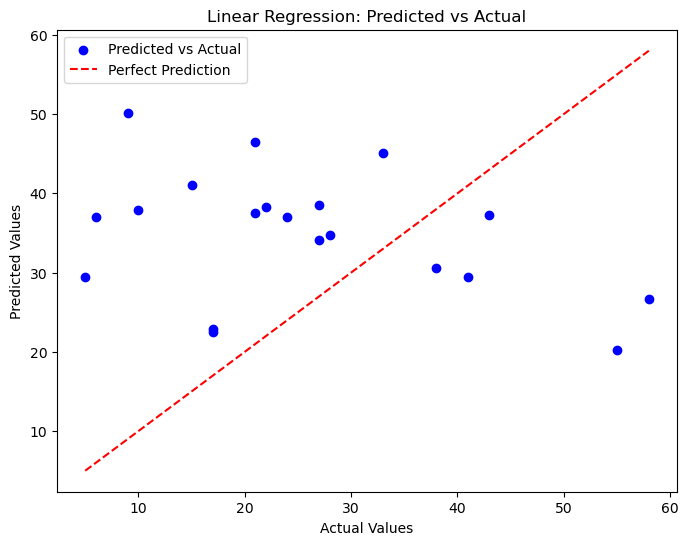

In [68]:
# Linear Regression - Plot Predicted vs Actual
import matplotlib.pyplot as plt

# Make predictions
lr_pred = lr_model.predict(X_test)

# Plot Predicted vs Actual for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.show()

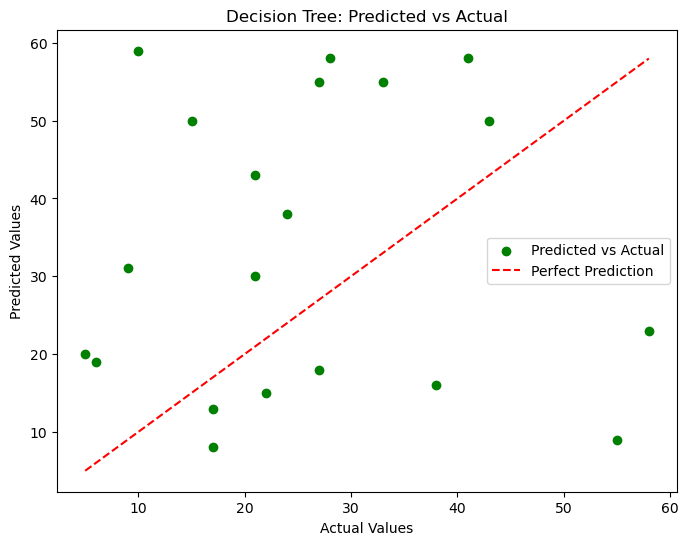

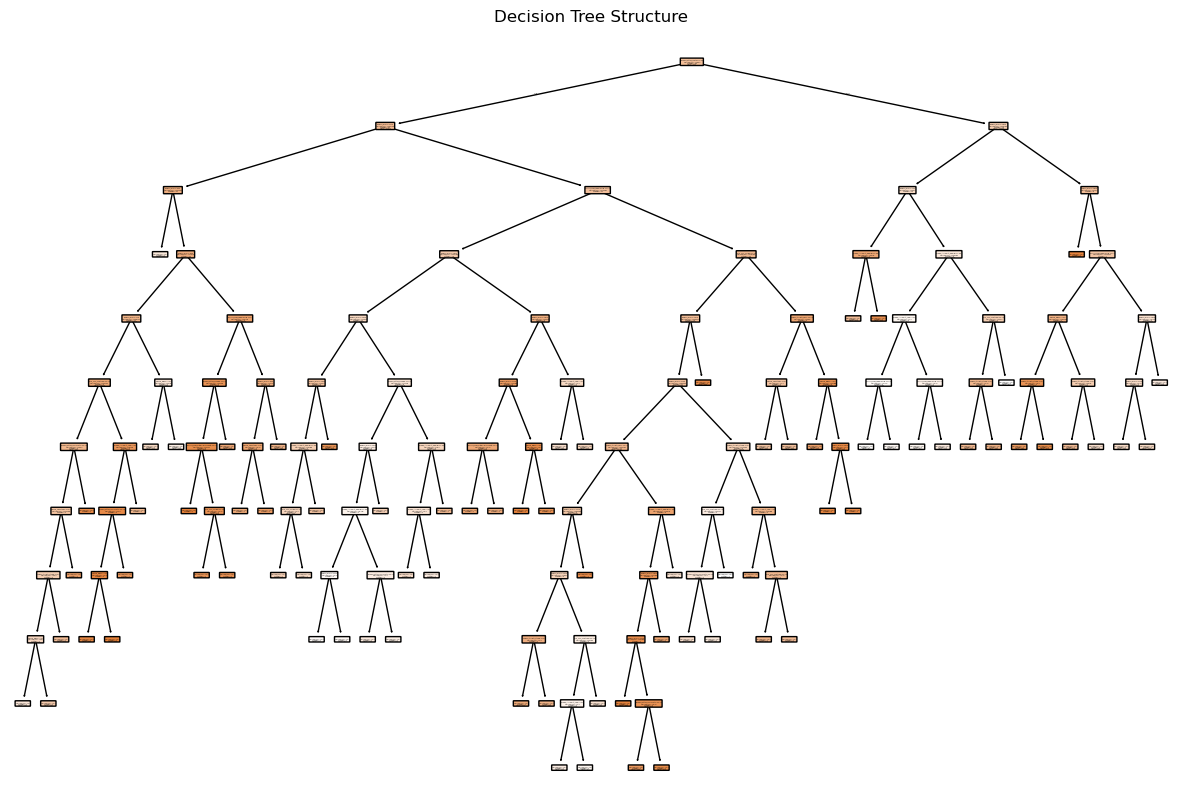

In [69]:
# Step 2: Decision Tree - Plot Predicted vs Actual
dt_pred = dt_model.predict(X_test)

# Plot Predicted vs Actual for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Predicted vs Actual')
plt.legend()
plt.show()

# Step 3: Visualize the Decision Tree structure (optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Low", "High"], rounded=True)
plt.title('Decision Tree Structure')
plt.show()

# Save the best-performing model

In [70]:
# Save the best-performing model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']